<h1 align="center" style="margin-bottom: 0px">Case de Avaliação Técnica - Cumbuca</h1>
<h2 align="center" style="margin-top: 0px; margin-bottom: 0px">Melissa Pereira</h2>
<h3 align="center" style="margin-top: 0px; margin-bottom: 0px">03/2023</h3>

## 1. Transcrição DNA → RNA

Ao analisar o problema proposto, constatamos que cada nucleotídeo presente em uma cadeia de DNA possui um nucleotídeo correspondente em uma transcrição para RNA. A partir disto, é possível mapear cada caractere de DNA e substituí-lo pelo seu correspondente RNA.

In [1]:
def dna_transcription(dna: str) -> str:
    """
    Calcula a transcrição de um DNA (ácido desoxirribonucleico) para RNA (ácido ribonucleico).

    :param dna: Cadeia de nucleotídeos de um DNA.
    :return: A transcrição para uma cadeia de RNA.
    """
    rna_transcription = {'G': 'C', 'C': 'G', 'T': 'A', 'A': 'U'}
    rna = ''
    
    if not isinstance(dna, str):
        raise TypeError("O tipo da variável 'DNA' é restrito a strings.")

    try:
        for nucleotide in dna:
            rna += rna_transcription[nucleotide]
    except KeyError as k:
        raise KeyError(f"Durante a transcrição do DNA, a presença do nucleotídeo {k.args[0]} não é válida.")
    return rna

Para averiguar as possibilidades de erros e acertos contidos no código, podemos executar o teste unitário descrito abaixo:

In [2]:
import unittest

class TestDNATranscription(unittest.TestCase):
    def test_invalid_inputs(self):
        with self.assertRaises(TypeError):
            dna_transcription(123)
        with self.assertRaises(KeyError):
            dna_transcription('AUCGT')
        with self.assertRaises(KeyError):
            dna_transcription('\\')

    def test_valid_inputs(self):
        self.assertEqual(dna_transcription('GGCTA'), 'CCGAU')
        self.assertEqual(dna_transcription('ACTGATA'), 'UGACUAU')
        self.assertEqual(dna_transcription(''), '')


unittest.main(argv=[''], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.006s

OK


## 2. Momentos Estatísticos

Podemos entender o k-ésimo momento amostral e o momento central como duas medidas estatísticas comumente utilizadas para descrever as propriedades de uma distribuição de dados. Sendo:<br>
- O k-ésimo momento amostral uma medida que descreve a tendência central de uma distribuição de dados e pode ser definido como a média aritmética das potências k para cada observação na amostra.

$${\frac{1}{n}\sum_{i=1}^n x_i^k}$$

- E o momento central uma medida que descreve a forma da distribuição em relação à sua média simples. O k-ésimo momento central é calculado a partir dos desvios em relação à média elevados à k-ésima potência. Onde a média $\overline{x}$ é o primeiro momento amostral (k=1), equivalente à uma média aritmética simples das amostras.

$${\frac{1}{n}\sum_{i=1}^n (x_i - \overline{x})^k}$$

In [3]:
import statistics

def statistical_moments(samples: list[float], k: int, central: bool) -> float:
    """
    Calcula o momento amostral ou momento central de ordem k de uma lista de amostras.

    :param samples: Lista de amostras.
    :param k: K-ésimo momento a ser calculado.
    :param central: Indica se o momento central deve ser calculado (True) ou não (False).
    :return: O valor do momento amostral ou momento central de ordem k.
    """
    if not samples:
        raise ValueError("A lista de amostras não pode ser vazia.")

    moment, central_moment = 0.0, 0.0

    mean = statistics.mean(samples)  # primeiro momento amostral

    for sample in samples:
        moment += sample ** k
        central_moment += (sample - mean) ** k

    moment /= len(samples)
    central_moment /= len(samples)

    return central_moment if central else moment

Para verificar a assertividade dos cálculos no código, podemos executar o teste unitário descrito abaixo:

In [4]:
class TestStatisticalMoments(unittest.TestCase):
    def test_invalid_inputs(self):
        with self.assertRaises(ValueError):
            statistical_moments([], k=1, central=False)

    def test_moments(self):
        self.assertEqual(statistical_moments([1, 2, 3], k=1, central=False), 2)
        self.assertEqual(statistical_moments([1, 2, 3, 4], k=2, central=False), 7.5)

    def test_central_moments(self):
        self.assertEqual(statistical_moments([1, 2, 3, 4], k=1, central=True), 0)
        self.assertEqual(statistical_moments([1, 2, 3, 4], k=2, central=True), 1.25)


unittest.main(argv=[''], exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


## 3. Processando e Explorando Dados em um Banco Relacional

Com o uso da biblioteca <i>nyclfights13</i>, que contém informações sobre os voos que passaram pela cidade de Nova Iorque em 2013, foi possível responder às perguntas apresentadas na seção 3 do desafio. Antes do desenvolvimento das soluções, os dados precisaram ser manipulados e limpos para que os resultados fossem precisos e condizentes com as expectativas.

Além disso, apesar do banco de dados não seguir a estrutura convencional de um RDS, já que se apresenta através de <i>Python Pandas.DataFrames</i>,
a lógica para o desenvolvimento das soluções foi criada em cima de uma estrutura em <b>ANSI-SQL</b>. Com isso, o raciocínio pôde ser facilmente replicado em um código em <i>Python</i> com base em estruturas de dataframes.

###### O desenvolvimento das questões em ANSI-SQL pode ser encontrado no arquivo <i>"ansi_sql_sec3_solutions"</i>.

In [5]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nycflights13 import flights, airports, planes, airlines

In [6]:
# criando uma variável que indique o atraso total de um vôo (partida + desembarque)
flights['total_delay'] = flights['dep_delay'] + flights['arr_delay']
flights['total_delay'].fillna(0, inplace=True)

# tirando o timestamp das horas
flights['time_hour'] = pd.to_datetime(flights['time_hour']).dt.date

In [7]:
def format_time(timestamp: float) -> str:
    """
    Formata para o padrão HH:MM um tempo dado que é apresentado como 
    HHMM, HMM, HM em formato de ponto flutuante (Float).

    :param timestamp: Um tempo (Float) nos formatos HHMM, HMM, HM.
    :return: Um tempo formatado no padrão HH:MM.
    """
    if timestamp == 0:
        return datetime.time(0, 0).strftime('%H:%M')
    elif timestamp < 100:
        time_str = '0' + str(int(float(timestamp)))
    else:
        time_str = str(int(float(timestamp)))
    
    if len(time_str) == 4:
        if time_str[:2] == '24':
            time_obj = datetime.time(0, int(time_str[2:]))
        else:
            time_obj = datetime.time(int(time_str[:2]), int(time_str[2:]))
    elif len(time_str) == 3:
        time_obj = datetime.time(int(time_str[:1]), int(time_str[2:]))
    else:
        time_obj = datetime.time(int(time_str[:1]), int(time_str[1:]))

    return time_obj.strftime('%H:%M')

In [8]:
# formata para o padrão de tempo HH:MM, o tempo de chegada ao aeroporto de destino.
flights['arr_time'].fillna(0, inplace=True)
flights['arr_time'] = flights['arr_time'].apply(format_time)
flights['arr_hour'] = pd.to_datetime(flights['arr_time']).dt.hour  # nova coluna para armazenar as horas de chegada ao aeroporto.

### 3.1. Média e Desvio Padrão Móveis dos Atrasos

In [9]:
# função auxiliar para manter o objetivo de programação funcional
def generate_date_interval(start_date: str, end_date: str) -> list:
    """
    Gera uma lista de datas contidas num intervalo, seguindo o formato: YYYY-MM.
    
    :param start_date: Data inicial do intervalo.
    :param end_date: Data final do intervalo.
    :return: uma lista de datas contidas no intervalo.
    """
    date = pd.date_range(start_date, end_date, freq='MS')

    return pd.to_datetime(date, format="%Y-%m")

In [10]:
def rolling_avg_std(df: pd.DataFrame, time_column: str, column: str, period: int):
    """
    Plota um gráfico com o valor real, a média móvel e desvio padrão móvel em uma série temporal dado uma coluna escolhida.

    :param df: Dados que contém as informações de tempo e coluna para os cálculos.
    :param time_column: Nome da coluna que possui as informações de tempo.
    :param column: Nome da coluna a ser calculada a média e desvio padrão.
    :param period: Tamanho da janela móvel. 
    :return: Um gráfico com as informações de valor real, média móvel e desvio padrão móvel.
    """
    df[f'{period}day_rolling_avg'] = df[column].rolling(window=period).mean()
    df[f'{period}day_rolling_std'] = df[column].rolling(window=period).std()

    plt.figure(figsize=(20, 5))
    sns.lineplot(x = time_column,
                 y = column,
                 data = df,
                 label = column)
    sns.lineplot(x = time_column,
                 y = f'{period}day_rolling_avg',
                 data = df,
                 label = 'avg')
    sns.lineplot(x = time_column,
                 y = f'{period}day_rolling_std',
                 data = df,
                 label = 'std')

    plt.xlabel(f'Months of 2013')
    pos = generate_date_interval(f'2013-01-01', f'2013-12-01')
    lab = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

    plt.xticks(pos, lab)
    plt.ylabel(column)

    plt.legend()
    plt.show()

Com as funções acima e as colunas do dataframe ['time_hour'] e ['total_delay'] indicando, respectivamente, a data de decolagem e o atraso total dos voos <i>(partida + desembarque)</i>, podemos plotar um gráfico de série temporal comparando os valores reais, a média móvel e o desvio padrão móvel na janela de 30 dias. 

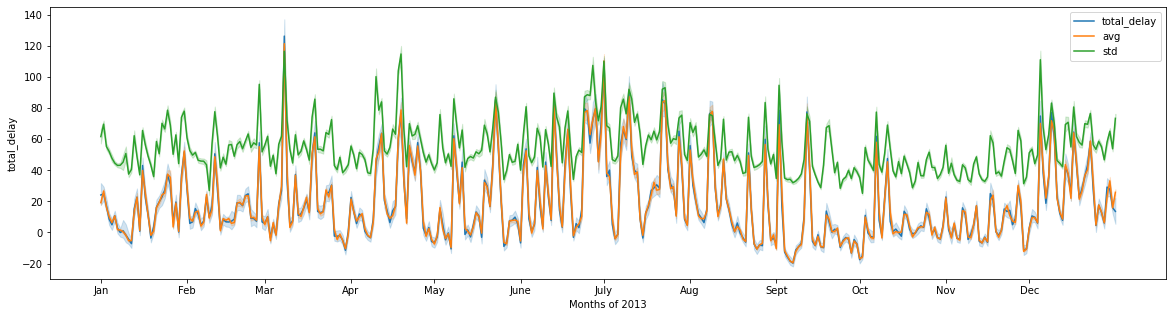

In [11]:
rolling_avg_std(flights, time_column='time_hour', column='total_delay', period=30)

### 3.2. Porcentagem dos Voos que Atrasam mais de 5 min. por Mês e Companhia Aérea

Para desenvolver esta solução podemos juntar à esquerda, os dados de voos com os dados de companhias aéreas.

In [12]:
flights_airlines = pd.merge(flights, airlines, on='carrier', how='left')

Agrupando esta união pelo mês do voo e nome das companhias aéreas, para calcular o número de voos e o total de atrasos para cada agrupamento.

In [13]:
result = flights_airlines.groupby(['month', 'name'], sort=False).agg(
    flights=('flight', 'count'),
    delayed_mt_5=('total_delay', lambda x: (x > 5).sum())
)

# Cálculo do percentual de voos com atraso acima de 5 minutos agrupados por mês e companhia aérea
result['percentage_delays'] = (result['delayed_mt_5'] / result['flights']) * 100
result = result.reset_index()

Com isso, obtemos os valores percentuais em uma tabela apresentada abaixo:

In [14]:
result

,month,name,flights,delayed_mt_5,percentage_delays
0,1,United Air Lines Inc.,4637,1729.0,37.287039
1,1,American Airlines Inc.,2794,841.0,30.100215
2,1,JetBlue Airways,4427,1610.0,36.367743
3,1,Delta Air Lines Inc.,3690,805.0,21.815718
4,1,ExpressJet Airlines Inc.,4171,2085.0,49.988012
...,...,...,...,...,...
180,9,Endeavor Air Inc.,1540,342.0,22.207792
181,9,Hawaiian Airlines Inc.,25,1.0,4.000000
182,9,Frontier Airlines Inc.,58,21.0,36.206897
183,9,Mesa Airlines Inc.,42,13.0,30.952381


Para obter o pior mês do ano, considerando portanto que isso signifique possuir o maior atraso, da empresa <i>Delta Air Lines Inc.</i>, podemos executar:

In [15]:
max_idx = result.loc[result['name'] == 'Delta Air Lines Inc.', 'percentage_delays'].idxmax()
# result.loc[max_idx, 'month']  # para obter apenas o mês
result.iloc[max_idx]  # obtém toda a linha referente ao pior mês

month                                   7
name                 Delta Air Lines Inc.
flights                              4251
delayed_mt_5                       1751.0
percentage_delays               41.190308
Name: 143, dtype: object

### 3.3. Quantidade de Aviões Distintos e Voos Realizados por Fabricante

De forma semelhante à lógica da sessão acima, podemos juntar à esquerda, os dados de voos com os dados de aviões. Agrupando esta união pelo fabricante e calculando o número de aviões distintos e o total de vôos para cada agrupamento.

In [16]:
flights_planes = pd.merge(flights, planes, on='tailnum', how='left')

result = flights_planes.groupby(['manufacturer']).agg(
    planes=('tailnum', lambda x: x.nunique()),
    flights=('flight', 'count')
).reset_index()

Com isso, obtemos os valores mostrados na tabela apresentada abaixo:

In [17]:
result

,manufacturer,planes,flights
0,AGUSTA SPA,1,32
1,AIRBUS,336,47302
2,AIRBUS INDUSTRIE,400,40891
3,AMERICAN AIRCRAFT INC,2,42
4,AVIAT AIRCRAFT INC,1,18
5,AVIONS MARCEL DASSAULT,1,4
6,BARKER JACK L,1,252
7,BEECH,2,47
8,BELL,2,65
9,BOEING,1630,82912


Para obter a fabricante com menos voos realizados, podemos executar:

In [18]:
min_idx = result['flights'].idxmin()
# result.loc[min_idx, 'manufacturer']  # para obter apenas o nome da fabricante

result.iloc[min_idx]  # obtém toda a linha referente à fabricante

manufacturer    JOHN G HESS
planes                    1
flights                   3
Name: 21, dtype: object

### 3.4. Empresa que mais Realizou Voos com Aviões da <i>Airbus</i>

Novamente juntamos à esquerda, os dados de voos com os dados de aviões e companhias áreas. Desta vez filtrando apenas os dados relativos à fabricante <i>Airbus</i> e por fim, calculando o total de voos realizados para que seja possível filtrar pela companhia área que mais realizou os voos com esta fabricante.

In [19]:
flights_planes_airl = flights_planes.merge(airlines, on='carrier', how='left')
airbus_only = flights_planes_airl.loc[flights_planes_airl['manufacturer'] == 'AIRBUS']  # filtrando para aviões apenas da airbus

result = airbus_only.groupby(['name'])['flight'].count()  # calculando o total de voos realizados
result.loc[result == result.max()]  # exibindo apenas empresa que mais realizou voos da fabricante

name
JetBlue Airways    29596
Name: flight, dtype: int64

### 3.5. Quantidade de Voos que os Aeroportos receberam entre 18h00 e 22h00 no dia 03-Março

In [20]:
# variáveis globais para definição do intervalo de horas e data
HOUR_INTERVAL= [18, 22]  # sendo [hora inicial, final]
DATE = [3, 3]  # sendo [dia, mês]

Definindo que, receber um voo é proporcional ao local do desembarque, podemos desenvolver uma solução.<br>
Ajustamos o nome da variável <i>dest</i>, referente ao aeroporto de desembarque do voo, para <i>faa</i>, para que seja possível juntarmos à esquerda, os dados de voos com os dados de aeroportos. Filtramos os dados para o intervalo de horas e data escolhidos e, calculamos o total de voos desembarcados em cada aeroporto.

In [21]:
flights = flights.copy()
flights.rename(columns={'dest': 'faa'}, inplace=True)
flights_airports = pd.merge(flights, airports, on='faa', how='left')

airports_range = flights_airports.loc[(flights_airports['day'] == DATE[0]) &
                                      (flights_airports['month'] == DATE[1]) &
                                      (flights_airports['arr_hour'].between(HOUR_INTERVAL[0], HOUR_INTERVAL[1]))]

airports_range = airports_range.groupby(['name'])['flight'].count()

Chegando ao resultado:

In [22]:
airports_range

name
Akron Canton Regional Airport    1
Albany Intl                      1
Austin Bergstrom Intl            3
Baltimore Washington Intl        2
Birmingham Intl                  1
                                ..
Tulsa Intl                       1
Washington Dulles Intl           5
Will Rogers World                1
William P Hobby                  1
Yeager                           1
Name: flight, Length: 73, dtype: int64

## 4. Bibliografia

Os conceitos aplicados na seção 2. têm base em informações contidas nas seguintes fontes bibliográficas:

- CAMBIO, L. F. Estatística Descritiva: Conceitos Básicos. Departamento de Estatística, Universidade Federal do Paraná, 2021. Disponível em: http://leg.ufpr.br/~lucambio/CE050/20211S/Cap02.pdf. Acesso em:  14 mar. 2023.

- OLIVEIRA, M. M. de; PEREIRA, M. A. Estatística Descritiva. Escola de Estatística, Universidade Federal de Minas Gerais, 2013. Disponível em: https://www.est.ufmg.br/~marcosop/est031/aulas/Capitulo_7_1.pdf. Acesso em: 14 mar. 2023.

- HOFFMANN, L. S. M. Estimação de Parâmetros. Instituto de Matemática e Estatística, Universidade de São Paulo, 2009. Disponível em: https://www.ime.usp.br/~ligiahr/MAE0229/aula_estimacao1_2parte.pdf. Acesso em: 14 mar. 2023.